In [43]:
import matplotlib.pyplot as plt
import torch

from blocks import LinearBlock, BiasBlock, SinBlock, CosBlock, LnBlock, Pow2Block, Pow3Block, SqrtBlock, CubeRootBlock, \
    SigmoidBlock, InverseBlock
from model import ModelFactory

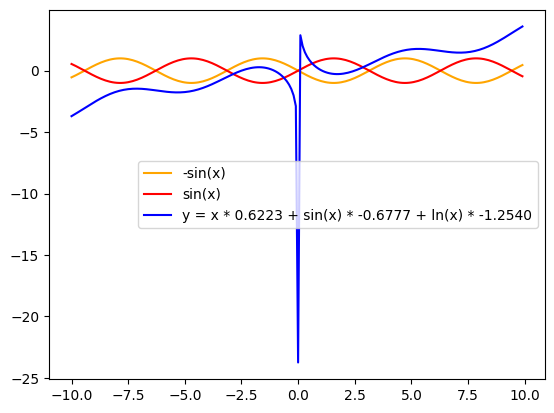

In [31]:
x_ = torch.arange(-10, 10, 0.1, dtype=torch.float32).unsqueeze(-1)
y1 = -1 * torch.sin(x_)
y2 = torch.sin(x_)
x = torch.vstack([x_, x_])
y = torch.vstack([y1, y2])

model = ModelFactory(x, y, max_size=3, min_significance=0.5).from_class_list(
    [LinearBlock, BiasBlock, SinBlock, CosBlock, LnBlock])

plt.plot(x_, y1, color="orange", label="-sin(x)")
plt.plot(x_, y2, color="red", label="sin(x)")
plt.plot(x_, model(x_).detach().numpy(), color="blue", label=str(model))
plt.legend()
plt.show()

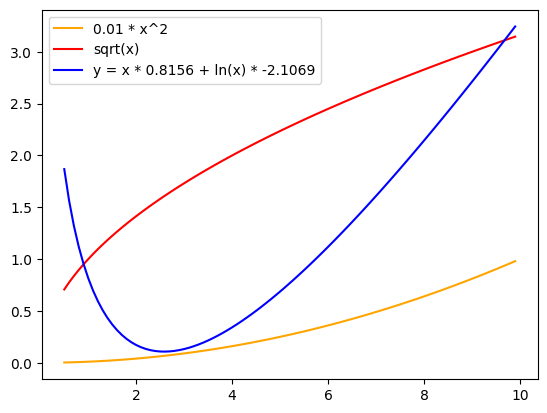

In [42]:
x_ = torch.arange(0.5, 10, 0.1, dtype=torch.float32).unsqueeze(-1)
y1 = 1e-2 * torch.pow(x_, 2)
y2 = torch.sqrt(x_)
x = torch.vstack([x_, x_])
y = torch.vstack([y1, y2])

model = ModelFactory(x, y, max_size=3, min_significance=0.5).from_class_list(
    [LinearBlock, BiasBlock, SinBlock, CosBlock, LnBlock, Pow2Block, Pow3Block, SqrtBlock, CubeRootBlock, SigmoidBlock])

plt.plot(x_, y1, color="orange", label="0.01 * x^2")
plt.plot(x_, y2, color="red", label="sqrt(x)")
plt.plot(x_, model(x_).detach().numpy(), color="blue", label=str(model))
plt.legend()
plt.show()

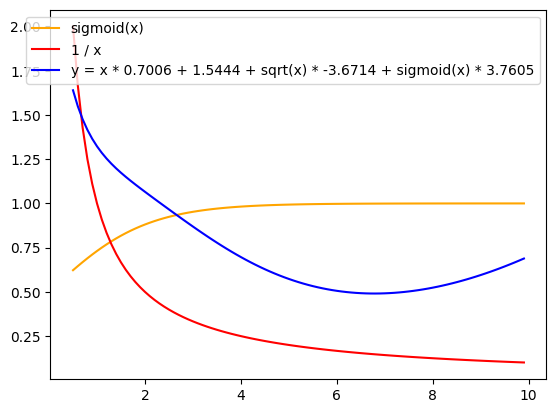

In [50]:
x_ = torch.arange(0.5, 10, 0.1, dtype=torch.float32).unsqueeze(-1)
y1 = torch.sigmoid(x_)
y2 = 1 / x_
x = torch.vstack([x_, x_])
y = torch.vstack([y1, y2])

model = ModelFactory(x, y, max_size=5, min_significance=0.5).from_class_list(
    [LinearBlock, BiasBlock, SinBlock, CosBlock, LnBlock, Pow2Block, Pow3Block, SqrtBlock, CubeRootBlock, SigmoidBlock,
     InverseBlock])

plt.plot(x_, y1, color="orange", label="sigmoid(x)")
plt.plot(x_, y2, color="red", label="1 / x")
plt.plot(x_, model(x_).detach().numpy(), color="blue", label=str(model))
plt.legend()
plt.show()